# **Final project** 

## (Python 2 Swansea course - Aura Frizzati)



## **1. Introduction**
- For this final project I am choosing the data mining/analytics path.
- I will look at some open data downloaded from [StatsWales repository](https://statswales.gov.wales/catalogue)
- Specifically, I will download monthly data about [**number of attendances in NHS Wales emergency departments by age band, sex and site**](https://statswales.gov.wales/Catalogue/Health-and-Social-Care/NHS-Hospital-Waiting-Times/emergency-department/emergencyattendances-by-age-sex-site)

In [27]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Ignore warning messages
warnings.filterwarnings('ignore')

## **2. Data Retrieval**

The data could be downloaded as a `.csv` file from StatsWales, however I will make use of the library [**`statswalespy`**](https://pypi.org/project/statswalespy/), which connects directly to StatsWales' application programme interface (API). It allows to download data and directly store it as an object in python, without need to filter and download the data manually.

In [11]:
from statswalespy.download_data import statswales_get_dataset

#ED_wales_raw_data = statswales_get_dataset("HLTH0037")
## data gets saves as a pandas dataframe

Data extracted with 95597 rows, and 23 columns.


In [20]:
## save data as a csv file
#ED_wales_raw_data.to_csv('/Users/aurafrizzati/Desktop/python2-swansea-course/final_project/raw_data/ED_wales_raw_data.csv', index=False)

In [4]:
## re-import data as CSV file
ED_wales_raw_data = pd.read_csv('/Users/aurafrizzati/Desktop/python2-swansea-course/final_project/raw_data/ED_wales_raw_data.csv')

## **3. Data Exploration: cleaning and visualisation**

In [5]:
ED_wales_raw_data.shape

(95597, 23)

- The dataset contains 95,597 records and 23 columns.

- The following is the extract of the first 5 records:

In [6]:
ED_wales_raw_data.head()

,Data,Age_Code,Age_ItemName_ENG,Age_SortOrder,Age_Hierarchy,Age_ItemNotes_ENG,Date_Code,Date_ItemName_ENG,Date_SortOrder,Date_ItemNotes_ENG,...,Sex_Hierarchy,Sex_ItemNotes_ENG,Hospital_Code,Hospital_ItemName_ENG,Hospital_SortOrder,Hospital_Hierarchy,Hospital_ItemNotes_ENG,Hospital_AltCode1,RowKey,PartitionKey
0,1.0,0-4,0-4,2.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A47A4BV,University Hospital Of Wales,28.0,W11000029,NaN,7A4BV,0,NaN
1,1.0,55-59,55-59,11.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A67A6AV,Ysbyty Ystrad Fawr,43.0,W11000028,NaN,7A6AV,1,NaN
2,1.0,60-64,60-64,12.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A3x7A3C4,Singleton Hospital,25.0,W11000026,NaN,7A3C4,2,NaN
3,1.0,55-59,55-59,11.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A67A6AM,Nevill Hall Hospital,40.0,W11000028,This hospital has been re-classified following...,7A6AM,3,NaN
4,2.0,55-59,55-59,11.0,All,NaN,2016m04,April 2016,119,NaN,...,99,NaN,7A67A6AU,Ysbyty Aneurin Bevan,42.0,W11000028,NaN,7A6AU,4,NaN


- All columns are coded as `Dtype` = `object` except for columns `Data` (which contains the number of emergency attendances), `Age_SortOrder` and `Hospital_SortOrder`, which are instead `float64`.
- Three columns (`Age_ItemNotes_ENG`, Date`_`ItemNotes_ENG, `Sex_ItemNotes_ENG` and `PartitionKey`) do not contain any data, while column `Hospital_ItemNotes_ENG` contains only 16,683 records

In [5]:
ED_wales_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95597 entries, 0 to 95596
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    95597 non-null  float64
 1   Age_Code                95597 non-null  object 
 2   Age_ItemName_ENG        95597 non-null  object 
 3   Age_SortOrder           95597 non-null  float64
 4   Age_Hierarchy           95597 non-null  object 
 5   Age_ItemNotes_ENG       0 non-null      float64
 6   Date_Code               95597 non-null  object 
 7   Date_ItemName_ENG       95597 non-null  object 
 8   Date_SortOrder          95597 non-null  int64  
 9   Date_ItemNotes_ENG      0 non-null      float64
 10  Sex_Code                95597 non-null  int64  
 11  Sex_ItemName_ENG        95597 non-null  object 
 12  Sex_SortOrder           95597 non-null  int64  
 13  Sex_Hierarchy           95597 non-null  int64  
 14  Sex_ItemNotes_ENG       0 non-null    

- I then check the unique values within each column of the dataset (excluding the first row `Data`, which contains the number of monthly emergency attendances):

In [7]:
{col:ED_wales_raw_data[col].unique() for col in ED_wales_raw_data.iloc[:,1:].columns}

{'Age_Code': array(['0-4', '55-59', '60-64', '45-49', '30-34', '85', '18-24', '25-29',
        '40-44', '50-54', '5-17', '35-39', '70-74', '75-79', '80-84',
        'Unknown', '65-69'], dtype=object),
 'Age_ItemName_ENG': array(['0-4', '55-59', '60-64', '45-49', '30-34', '85 and over', '18-24',
        '25-29', '40-44', '50-54', '5-17', '35-39', '70-74', '75-79',
        '80-84', 'Unknown', '65-69'], dtype=object),
 'Age_SortOrder': array([ 2., 11., 12.,  9.,  6., 17.,  4.,  5.,  8., 10.,  3.,  7., 14.,
        15., 16., 18., 13.]),
 'Age_Hierarchy': array(['All'], dtype=object),
 'Age_ItemNotes_ENG': array([nan]),
 'Date_Code': array(['2016m04', '2016m05', '2016m06', '2016m07', '2016m08', '2016m09',
        '2016m10', '2016m11', '2016m12', '2017m01', '2017m02', '2017m03',
        '2017m04', '2017m05', '2017m06', '2017m07', '2017m08', '2017m09',
        '2017m10', '2017m11', '2017m12', '2018m01', '2018m02', '2018m03',
        '2018m04', '2018m05', '2018m06', '2018m07', '2018m08', '2018

### **3.1 Data Cleaning**

- After having inspected the columns' unique values, I will retain only the following columns for further analysis (I remove columns that are redundant, columns with values that are not well defined and columns with missing values):
    - `Data` = the monthly emergency attendances recorded in Welsh hospitals (float)
    - `Age_ItemName_ENG` = the age group of the individual/s presenting at the emergency dept (string)
    - `Date_ItemName_ENG` = date and year when the emergency attendances where recorded (string)
    - `Sex_ItemName_ENG` =  the sex group of the individual/s presenting at the emergency dept (string)
    - `Hospital_ItemName_ENG` =  the emergency dept's hospital (string)
    - `Hospital_Hierarchy` =  the Welsh Local Health Board code where a hospital is located (string)
    
    
- Note: records are at an **aggregated level**, i.e. each record in the dataset does not belong to a specific individual, but to groups of individuals with the same characteristics of age group and sex, presenting at the same emergency dept in the same month-year. This is common of open source data containing confidential information, in order to ensure anonimity

In [7]:
ED_wales_data_cln = ED_wales_raw_data[['Data',
                                        'Age_ItemName_ENG',
                                        'Date_ItemName_ENG',
                                        'Sex_ItemName_ENG',
                                        'Hospital_ItemName_ENG',
                                        'Hospital_Hierarchy']].copy()

- Due to personal knowledge, I will then convert each Local health board code (stored in the `Hospital_Hierarchy` variable) into the corresponding local health board name, to make the data hopefully more familiar to the reader.

In [8]:
## function to assign LHB names to their corresponding codes
def LHB_names(row):
    if row['Hospital_Hierarchy'] == 'W92000004':
        return 'Wales'
    elif row['Hospital_Hierarchy'] == 'W11000023':
        return 'Betsi Cadwaladr'
    elif row['Hospital_Hierarchy'] == 'W11000024':
        return 'Powys Teaching'
    elif row['Hospital_Hierarchy'] == 'W11000025':
        return 'Hywel Dda'
    elif row['Hospital_Hierarchy'] == 'W11000031':
        return 'Swansea Bay'
    elif row['Hospital_Hierarchy'] == 'W11000026':
        return 'Abertawe Bro Morgannwg'
    elif row['Hospital_Hierarchy'] == 'W11000030':
        return 'Cwm Taf Morgannwg'
    elif row['Hospital_Hierarchy'] == 'W11000027':
        return 'Cwm Taf'
    elif row['Hospital_Hierarchy'] == 'W11000028':
        return 'Aneurin Bevan'
    elif row['Hospital_Hierarchy'] == 'W11000029':
        return 'Cardiff & Vale'
    else:
        return 'Other'

In [9]:
ED_wales_data_cln['LHB'] = ED_wales_data_cln.apply(LHB_names, axis=1)

- I will also convert the **Month-Year column** (`Date_ItemName_ENG`) into a **datetime** type

In [34]:
ED_wales_data_cln['Date_ItemName_ENG'] = pd.to_datetime(ED_wales_data_cln['Date_ItemName_ENG'], format = '%B %Y')
ED_wales_data_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95597 entries, 0 to 95596
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data                   95597 non-null  float64       
 1   Age_ItemName_ENG       95597 non-null  object        
 2   Date_ItemName_ENG      95597 non-null  datetime64[ns]
 3   Sex_ItemName_ENG       95597 non-null  object        
 4   Hospital_ItemName_ENG  95597 non-null  object        
 5   Hospital_Hierarchy     95597 non-null  object        
 6   LHB                    95597 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.1+ MB


### **3.2 Exploratory Data Visualisation**

The next step is to start **plotting** the data in order to get a first grasp of the variables. I will use **bar plots** for the **categorical variables** and a **box plot** for the only **quantitative variable**.

#### **3.2.1 Sex group** variable (`Sex_ItemName_ENG`) - categorical

In [28]:
print("Number of unique categories for Sex group variable: ", ED_wales_data_cln['Sex_ItemName_ENG'].nunique())

Number of unique categories for Sex group variable:  3


[Text(0.5, 1.0, 'Number of records by Sex group'), Text(0.5, 0, 'Sex group')]

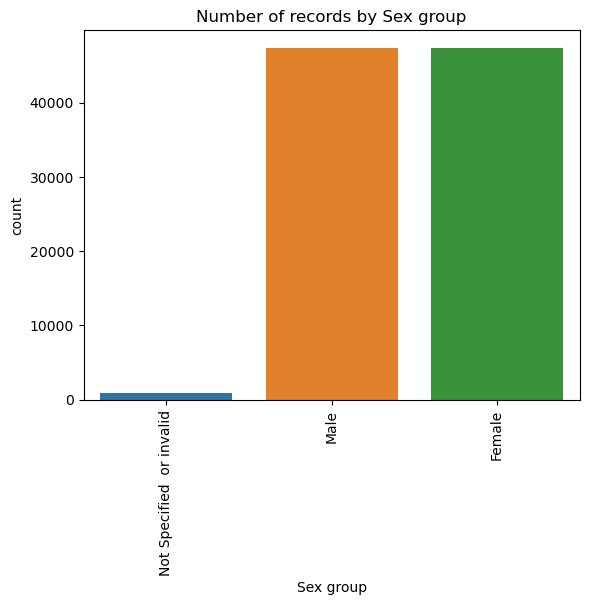

In [11]:
## counts by Sex group variable
plot = sns.countplot(x="Sex_ItemName_ENG", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Sex group", xlabel="Sex group")

#### **3.2.2 Age group** variable (`Age_ItemName_ENG`) - categorical

In [29]:
print("Number of unique categories for Age Group variable: ", ED_wales_data_cln['Age_ItemName_ENG'].nunique())

Number of unique categories for Age Group variable:  17


[Text(0.5, 1.0, 'Number of records by Age Group'), Text(0.5, 0, 'Age Group')]

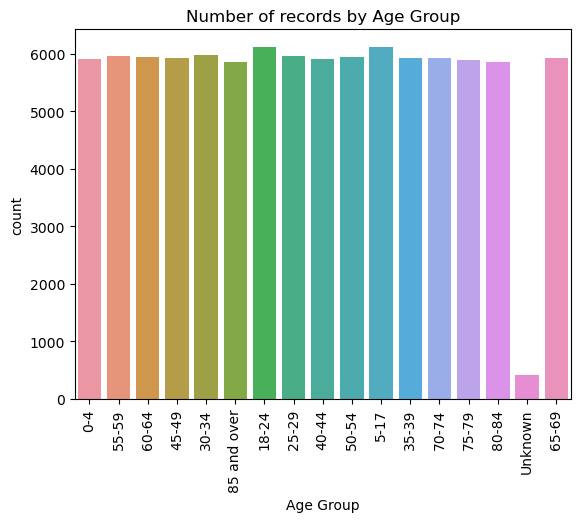

In [26]:
## counts by Age Group variable
plot = sns.countplot(x="Age_ItemName_ENG", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Age Group", xlabel="Age Group")

#### **Hospital** variable (`Hospital_ItemName_ENG`)  - categorical

In [30]:
print("Number of unique categories for Hospital variable: ", ED_wales_data_cln['Hospital_ItemName_ENG'].nunique())

Number of unique categories for Hospital variable:  39


[Text(0.5, 1.0, 'Number of records by Hospital'), Text(0.5, 0, 'Hospital')]

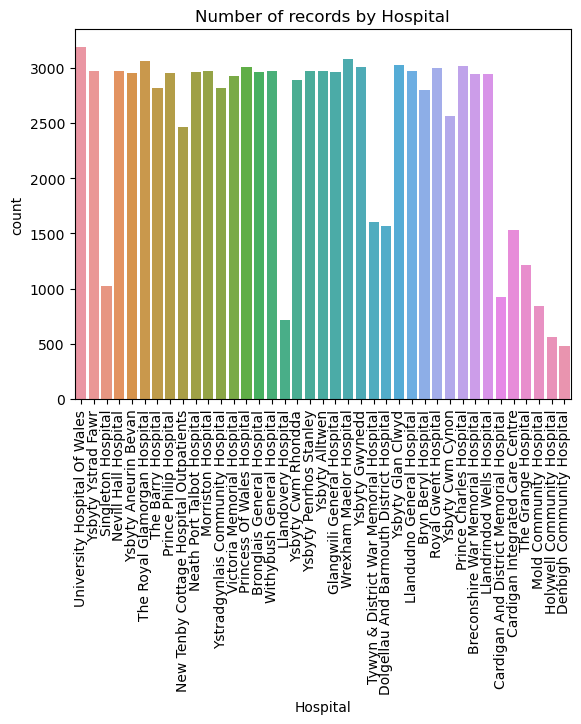

In [12]:
## counts by Hospital variable
plot = sns.countplot(x="Hospital_ItemName_ENG", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Hospital", xlabel="Hospital")

#### **3.2.3 Local Health Board** variable (`LHB`)  - categorical

In [31]:
print("Number of unique categories for LHB variable: ", ED_wales_data_cln['LHB'].nunique())

Number of unique categories for LHB variable:  9


[Text(0.5, 1.0, 'Number of records by Local Health Board'),
 Text(0.5, 0, 'Local Health Board')]

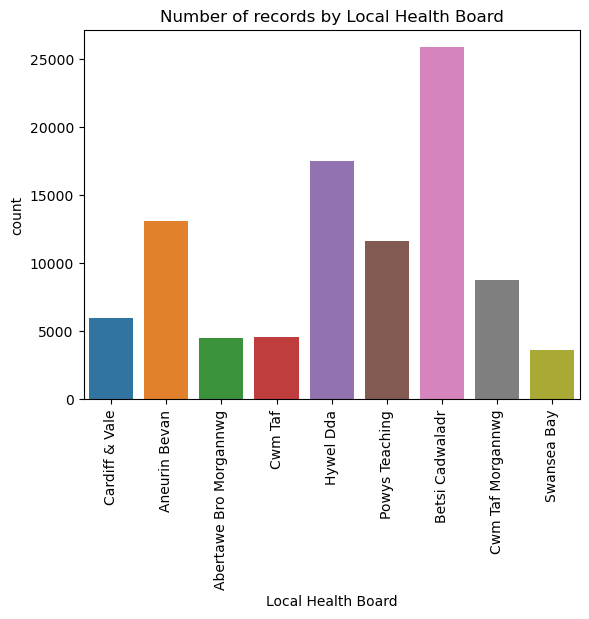

In [21]:
## counts by Welsh Local Health Board
plot = sns.countplot(x="LHB", data=ED_wales_data_cln)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title="Number of records by Local Health Board", xlabel="Local Health Board")

#### **3.2.4 Number of Emergency Dept (ED) attendances** variable (`Data`)  - quantitative

In [36]:
print("ED monthly Attendances: Median = {}, Minimum = {}, Maximum = {}".format(ED_wales_data_cln['Data'].median(), ED_wales_data_cln['Data'].min(), ED_wales_data_cln['Data'].max()))

ED monthly Attendances: Median = 41.0, Minimum = 1.0, Maximum = 1236.0


[Text(0.5, 1.0, 'Distribution of monthly ED Attendances'),
 Text(0.5, 0, 'Monthly ED Attendances')]

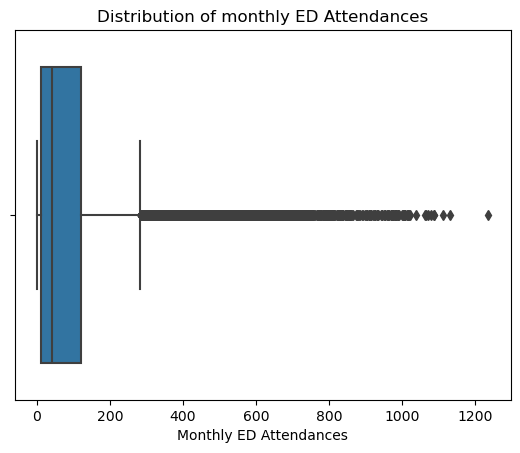

In [29]:
## boxplot of ED attendances data
plot = sns.boxplot(x="Data", data=ED_wales_data_cln)
plot.set(title="Distribution of monthly ED Attendances", xlabel="Monthly ED Attendances")

## **4. Plotting time series and fitting a time series model to the historical data**

I will start by looking at the plots of different time series stored within the dataset. I will use the `plotly` library to obtain **interactive time line plots**. I will also keep on using `seaborn` to show **static plots**.

### **4.1 All Wales aggregated time series**
- ED attendances have been aggregated by time point (Month-Year) to obtain an overview for the whole Wales nation
- You can notice some **seasonal structure** within the data (recurring peaks and troughs within the period of one year)
- You can also observe the **huge decrease in volume** in ED attendances between March 2020 and April 2021 caused by the **COVID pandemic**

[Text(0.5, 1.0, 'All Wales aggregated ED attendances'),
 Text(0.5, 0, 'Month-Year'),
 Text(0, 0.5, 'Monthly ED attendances')]

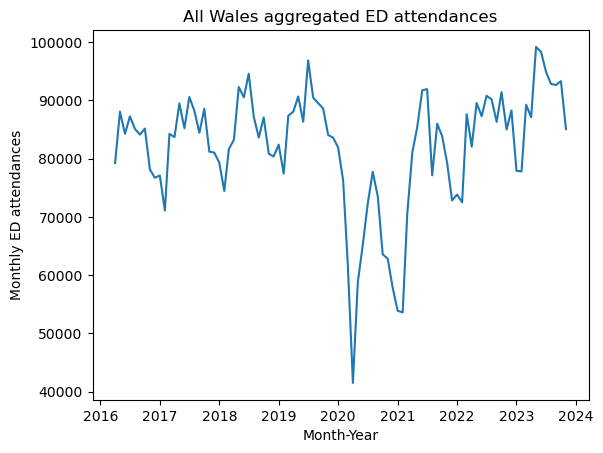

In [36]:
## aggregate the data by year
ED_wales_data_cln_AW = ED_wales_data_cln.groupby(['Date_ItemName_ENG'])['Data'].sum().reset_index()

## create the interactive time plot
fig = px.line(ED_wales_data_cln_AW.sort_values(by='Date_ItemName_ENG'),x='Date_ItemName_ENG', y='Data')
fig.update_layout(
    title="All Wales aggregated ED attendances", 
    xaxis_title="Month-Year", 
    yaxis_title="Monthly ED attendances")
fig.show()

## create the static plot
sns.lineplot(
    x="Date_ItemName_ENG", 
    y="Data", 
    data=ED_wales_data_cln_AW).set(
        title="All Wales aggregated ED attendances", 
        xlabel="Month-Year", 
        ylabel="Monthly ED attendances")

### **4.2 Time series aggregated by Local Health Board**

In [37]:
ED_wales_data_cln.columns

Index(['Data', 'Age_ItemName_ENG', 'Date_ItemName_ENG', 'Sex_ItemName_ENG',
       'Hospital_ItemName_ENG', 'Hospital_Hierarchy', 'LHB'],
      dtype='object')

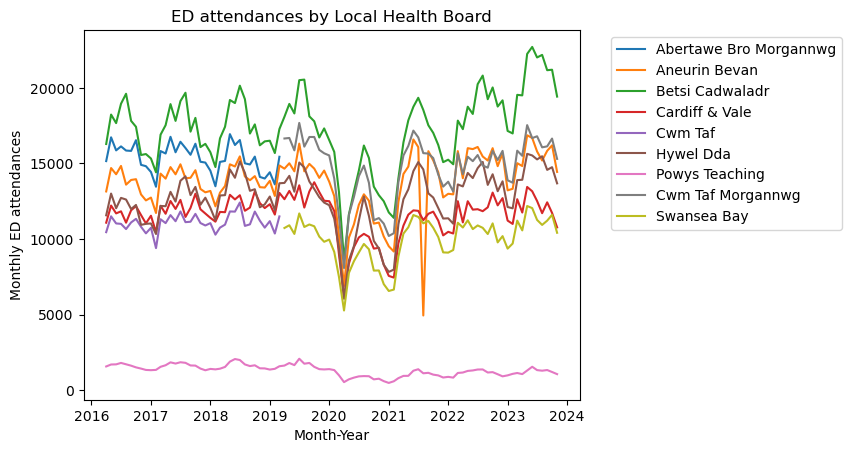

In [49]:

## aggregate the data by year
ED_wales_data_cln_LHB = ED_wales_data_cln.groupby(['Date_ItemName_ENG','LHB'])['Data'].sum().reset_index()

## create the interactive time plot
fig = px.line(
    ED_wales_data_cln_LHB.sort_values(by='Date_ItemName_ENG'),
    x='Date_ItemName_ENG', 
    y='Data',
    color= 'LHB')
fig.update_layout(
    title="ED attendances by Local Health Board", 
    xaxis_title="Month-Year", 
    yaxis_title="Monthly ED attendances")
fig.show()

## create the static plot
sns.lineplot(
    x="Date_ItemName_ENG", 
    y="Data", 
    hue = "LHB",
    data=ED_wales_data_cln_LHB).set(
        title="ED attendances by Local Health Board", 
        xlabel="Month-Year", 
        ylabel="Monthly ED attendances")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In order to handle time series data I will use a specialised python library, [**`pytimeTK`**](https://business-science.github.io/pytimetk/guides/01_visualization.html)

In order to handle time series data I will use a specialised python library, [**`pytimeTK`**](https://business-science.github.io/pytimetk/guides/01_visualization.html)

/Users/aurafrizzati/anaconda3/envs/swansea_python2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aurafrizzati/anaconda3/envs/swansea_python2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


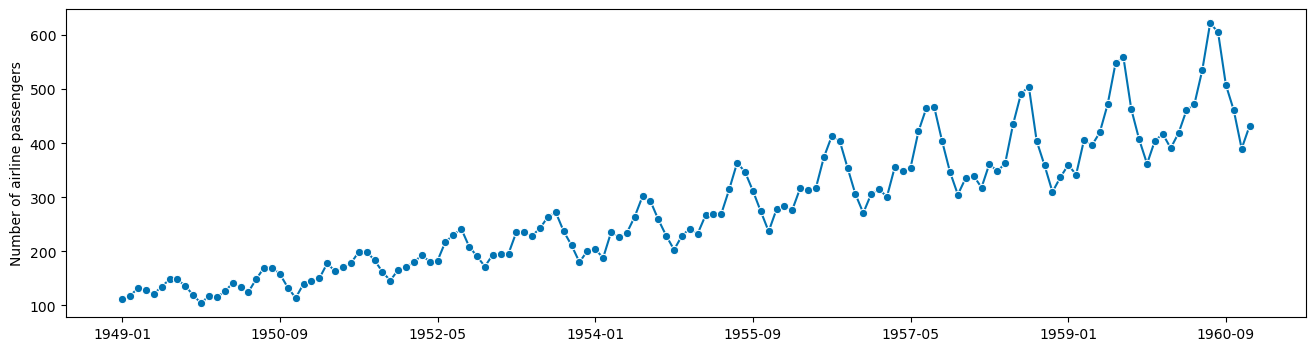

In [40]:
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline
y = load_airline()
fig, ax = plot_series(y) 

## **5. Forecasting**

## **6. Anomaly identification**